# a. Import all the neccessary packages

In [29]:
import nltk
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# b. Import the Modified dataset.

In [30]:
train_set = pd.read_csv('final_dataset.csv')
train_set.columns

Index(['Unnamed: 0', 'translated_text', 'voted_up', 'early_access'], dtype='object')

# c. Basic text modelling and cleaning activities.

### 1. Dropping unwanted column values and filling empty values present in 'translated_text' with empty string.

In [31]:
train_set.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
train_set['translated_text'] = train_set['translated_text'].fillna(" ")
train_set.head()

,translated_text,voted_up,early_access
0,that,True,False
1,"The game is good, but there are more and more ...",True,False
2,"Very unique experience for sure, we need more ...",True,False
3,"It needs work in areas, namely graphics, stabi...",True,True
4,✓,True,False


### 2. Converting boolean characters in 'voted_up' and 'early_access' to its numeric equivalent.


 Target_Arr[voted_up] [1 1 1 ... 0 0 0]

 Length of Target_ARR[voted_up] 5000

0 :  2500

1 :  2500


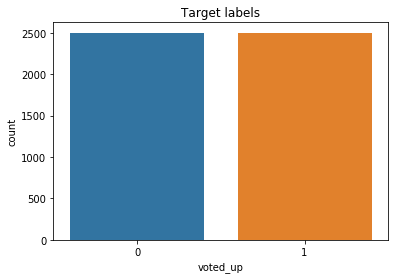


 Target_Arr[early_access] [0 0 0 ... 0 1 0]

 Length of Target_ARR[early_access] 5000

0 :  4468

1 :  532


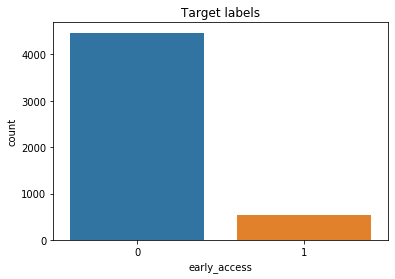

In [32]:
train_set["voted_up"] = train_set["voted_up"].astype(int)
train_set["early_access"] = train_set["early_access"].astype(int)
train_set.head()
warnings.filterwarnings("ignore")

target_Arr = np.array([int(i) for i in train_set["voted_up"]])
print("\n Target_Arr[voted_up]",target_Arr)
print("\n Length of Target_ARR[voted_up]",len(target_Arr))
count = 0
for i in target_Arr:
    if i == 0:
        count+=1
print("\n0 : ",count)
print("\n1 : ",len(target_Arr)-count)
sns.countplot(train_set.voted_up)
plt.title("Target labels")
plt.show()
target_Array = np.array([int(i) for i in train_set["early_access"]])
print("\n Target_Arr[early_access]",target_Array)
print("\n Length of Target_ARR[early_access]",len(target_Array))
count = 0
for i in target_Array:
    if i == 0:
        count+=1
print("\n0 : ",count)
print("\n1 : ",len(target_Array)-count)
sns.countplot(train_set.early_access)
plt.title("Target labels")
plt.show()

### 3. Dropping all rows from dataframe containing non english character in 'translated_text' column. 

In [33]:
from nltk.corpus import words
Word = list(set(words.words()))
train_set = train_set[train_set['translated_text'].str.contains('|'.join(Word))]
train_set = train_set.reset_index(drop=True)
train_set.shape

(4885, 3)

### 4. Converting all characters present in the 'translated_text' column to lower case.

In [34]:
train_set['translated_text'] = train_set['translated_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_set['translated_text'].head()

0                                                 that
1    the game is good, but there are more and more ...
2    very unique experience for sure, we need more ...
3    it needs work in areas, namely graphics, stabi...
4                                                 good
Name: translated_text, dtype: object

# d.Feature selection based on certain characterstic of contents present in  'tranlated_text' column.

### 1. Based on word count as a parameter

                                     translated_text  voted_up  early_access  \
0                                               that         1             0   
1  the game is good, but there are more and more ...         1             0   
2  very unique experience for sure, we need more ...         1             0   
3  it needs work in areas, namely graphics, stabi...         1             1   
4                                               good         1             0   

   txt_length  
0           4  
1          80  
2          48  
3        1313  
4           4  


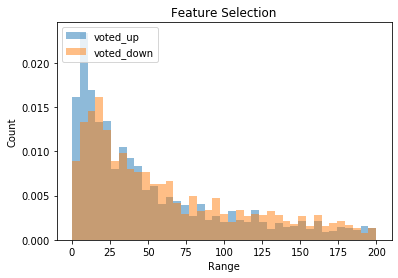

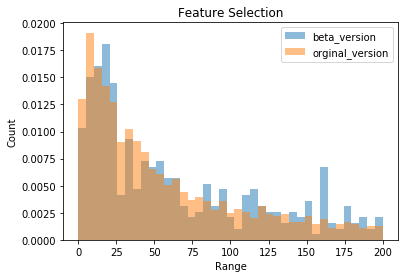

In [39]:
import string
#To caluclate length of reviews excluding spaces
train_set['txt_length'] = train_set['translated_text'].apply(lambda x: len(x) - x.count(" "))
print(train_set.head())
#Plotting the above findings in terms of histogram to evaluate whether words can be used to classify text. 
bins = np.linspace(0,200,40)
plt.hist(train_set[train_set['voted_up'] == 1]['txt_length'],bins,alpha=0.5,normed=True,label='voted_up')
plt.hist(train_set[train_set['voted_up'] == 0]['txt_length'],bins,alpha=0.5,normed=True,label='voted_down')
plt.xlabel("Range")
plt.ylabel("Count")
plt.legend(loc = 'upper left')
plt.title("Feature Selection")
plt.show()
#Plotting the above findings in terms of histogram to evaluate whether words can be used to classify text. 
bins = np.linspace(0,200,40)
plt.hist(train_set[train_set['early_access'] == 1]['txt_length'],bins,alpha=0.5,normed=True,label='beta_version')
plt.hist(train_set[train_set['early_access'] == 0]['txt_length'],bins,alpha=0.5,normed=True,label='orginal_version')
plt.legend(loc = 'upper right')
plt.title("Feature Selection")
plt.xlabel("Range")
plt.ylabel("Count")
plt.show()

### 2. Replacing all the special characters present in the 'translated_text' column with '' ".

In [9]:
train_set['translated_text'] = train_set['translated_text'].str.replace('[^\w\s]','')
train_set['translated_text'].head()

0                                                 that
1    the game is good but there are more and more c...
2    very unique experience for sure we need more o...
3    it needs work in areas namely graphics stabili...
4                                                 good
Name: translated_text, dtype: object

# e. Text Preprocessing Steps

### 1. Removing all the stop words present in the 'translated_text' column.

In [10]:
stop = stopwords.words('english')
train_set['translated_text'] = train_set['translated_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train_set['translated_text'].head()

0                                                     
1       game good cheats would better valves made paid
2                          unique experience sure need
3    needs work areas namely graphics stability qui...
4                                                 good
Name: translated_text, dtype: object

### 2. Dropping rows containing empty strings within the dataframe.

In [11]:
train_set.replace('', np.nan, inplace=True)
train = train_set.dropna()
train = train.reset_index(drop=True)
print (train.head())
train.shape

                                     translated_text  voted_up  early_access  \
0     game good cheats would better valves made paid         1             0   
1                        unique experience sure need         1             0   
2  needs work areas namely graphics stability qui...         1             1   
3                                               good         1             0   
4                                    may ________ 00         1             0   

   txt_length  
0          80  
1          48  
2        1313  
3           4  
4          31  


(4844, 4)

### 3. Correcting spelling mistakes in the  dataframe

In [12]:
x = "badd"
TextBlob(x).correct()

TextBlob("bad")

In [13]:
train['translated_text'].apply(lambda x: str(TextBlob(x).correct()))
train['translated_text'].head()

0       game good cheats would better valves made paid
1                          unique experience sure need
2    needs work areas namely graphics stability qui...
3                                                 good
4                                      may ________ 00
Name: translated_text, dtype: object

### 4. Performing Tokenization of words in 'translated_text' column.

In [14]:
from nltk.tokenize import word_tokenize
train['translated_text'].apply(lambda x:word_tokenize(x.lower()))
train['translated_text'].head()

0       game good cheats would better valves made paid
1                          unique experience sure need
2    needs work areas namely graphics stability qui...
3                                                 good
4                                      may ________ 00
Name: translated_text, dtype: object

### 5. Performing Stemming of words in 'translated_text' column.

In [15]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
train['translated_text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
train['translated_text'].head()

0       game good cheats would better valves made paid
1                          unique experience sure need
2    needs work areas namely graphics stability qui...
3                                                 good
4                                      may ________ 00
Name: translated_text, dtype: object

### 6. Performing lemmatization  of words in 'translated_text' column.

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("worse", pos="a")) #specifying that worse represent here is adjective 

bad


In [17]:
train['translated_text'] = train['translated_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(x) for word in x.split()]))
train['translated_text'].head()

0    game good cheats would better valves made paid...
1    unique experience sure need unique experience ...
2    needs work areas namely graphics stability qui...
3                                                 good
4      may ________ 00 may ________ 00 may ________ 00
Name: translated_text, dtype: object

# f.Splitting of dataset into train and test column 

In [27]:
#Assign each column Values:
train_text=train['translated_text']
target1=train.iloc[:,1]
target2=train.iloc[:,2]
from sklearn.model_selection import train_test_split
train_x1,test_x1,train_y1,test_y1 = train_test_split(train_text,target1,test_size = 0.2, random_state = 1)
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_text,target2,test_size = 0.2, random_state = 1)

# g.Implementation[Machine Learning algorithm]

In [18]:
# Import all neccessary package common to all ml models.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### 1. Baseline_Model using dummy classifier

In [19]:
#Dummy classifier for [Voted_up]
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
dummy = DummyClassifier(strategy='most_frequent').fit(train_x1,train_y1)
y1dummy = dummy.predict(test_x1)
cmtx_dummy1 = pd.DataFrame(
    confusion_matrix(test_y1, y1dummy), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print (cmtx_dummy1)
print(classification_report(test_y1, y1dummy, zero_division = 0))
accuracy_baseline = metrics.accuracy_score(test_y1,y1dummy)
print("BASELINE MODEL ACCURACY : ",accuracy_baseline)

          Pred:NO  Pred:YES
True:NO       487         0
True:YES      482         0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       487
           1       0.00      0.00      0.00       482

    accuracy                           0.50       969
   macro avg       0.25      0.50      0.33       969
weighted avg       0.25      0.50      0.34       969

BASELINE MODEL ACCURACY :  0.5025799793601651


In [20]:
#Dummy classifier for [early_access]
dummy_ea = DummyClassifier(strategy='most_frequent').fit(train_x2,train_y2)
y2dummy = dummy_ea.predict(test_x2)
cmtx_dummy2 = pd.DataFrame(
    confusion_matrix(test_y2, y2dummy), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print (cmtx_dummy2)
print(classification_report(test_y2, y2dummy, zero_division = 0))
accuracy_baseline = metrics.accuracy_score(test_y1,y2dummy)

print("BASELINE MODEL ACCURACY : ",accuracy_baseline)

          Pred:NO  Pred:YES
True:NO       877         0
True:YES       92         0
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       877
           1       0.00      0.00      0.00        92

    accuracy                           0.91       969
   macro avg       0.45      0.50      0.48       969
weighted avg       0.82      0.91      0.86       969

BASELINE MODEL ACCURACY :  0.5025799793601651


### 2.Implementation of multinominal Naive-Bayes classification algorithm

In [21]:
#Define the structure of the kNN-Classifier algorithm.
from sklearn.naive_bayes import MultinomialNB
clf_nb = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB())])
parameters = {'vect__ngram_range': [(1, 1), (2, 2)],
              'vect__max_df':[0.1,0.2,0.3],
              'tfidf__use_idf': (True, False),
              'clf__alpha': [0.1,0.001, 1, 10, 100]}
gs_clf_nb = GridSearchCV(clf_nb, parameters, n_jobs=-1, cv = 5)

In [22]:
#[voted_up]Naive-Bayes model involving object creation and trainning.
gs_clf_nb = gs_clf_nb.fit(train_x1, train_y1)

#Outputting the best combination parameters along with accuracy score.
print("The right combination values to get best score[voted_up]:",gs_clf_nb.best_params_)
print("The best score value[voted_up]:",gs_clf_nb.best_score_)

#Predicting the target[voted_up value]
y1_predicted_nb = gs_clf_nb.predict(test_x1)
print("The accuracy score obtained for test data[voted_up]:")
print(np.mean(y1_predicted_nb == test_y1))

#Confusion matrics for naive_bayes ml model.
cmtx_nb = pd.DataFrame(
    confusion_matrix(test_y1, y1_predicted_nb), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print("\nCONFUSION MATRIX")
print (cmtx_nb)
print("\nCLASSIFICATION REPORT")
print(classification_report(test_y1, y1_predicted_nb, zero_division = 0))
fpr_nb, tpr_nb, threshold = roc_curve(test_y1, y1_predicted_nb)

The right combination values to get best score[voted_up]: {'clf__alpha': 1, 'tfidf__use_idf': True, 'vect__max_df': 0.2, 'vect__ngram_range': (1, 1)}
The best score value[voted_up]: 0.760516129032258
The accuracy score obtained for test data[voted_up]:
0.7750257997936016

CONFUSION MATRIX
          Pred:NO  Pred:YES
True:NO       421        66
True:YES      152       330

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       487
           1       0.83      0.68      0.75       482

    accuracy                           0.78       969
   macro avg       0.78      0.77      0.77       969
weighted avg       0.78      0.78      0.77       969



In [23]:
#[early_access]Naive-Bayes model involving object creation and trainning.
gs_clf_nb_ea = gs_clf_nb.fit(train_x2, train_y2)

#Outputting the best combination parameters along with accuracy score.
print("The right combination values to get best score[early_access]:",gs_clf_nb_ea.best_params_)
print("The best score value[early_access]:",gs_clf_nb_ea.best_score_)

#Predicting the target[early access] value.
y2_predicted_nb = gs_clf_nb_ea.predict(test_x2)
print("The accuracy score obtained for test data[early_access]:")
print(np.mean(y2_predicted_nb == test_y2))

#Confusion matrics for naive_bayes ml model.
cmtx_nb_ea = pd.DataFrame(
    confusion_matrix(test_y2, y2_predicted_nb), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print("\nCONFUSION MATRIX")
print (cmtx_nb_ea)
print("\nCLASSIFICATION REPORT")
print(classification_report(test_y2, y2_predicted_nb, zero_division = 0))
fpr_nb_ea, tpr_nb_ea, threshold = roc_curve(test_y2, y2_predicted_nb)

The right combination values to get best score[early_access]: {'clf__alpha': 1, 'tfidf__use_idf': True, 'vect__max_df': 0.1, 'vect__ngram_range': (1, 1)}
The best score value[early_access]: 0.8895483870967743
The accuracy score obtained for test data[early_access]:
0.9050567595459237

CONFUSION MATRIX
          Pred:NO  Pred:YES
True:NO       877         0
True:YES       92         0

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       877
           1       0.00      0.00      0.00        92

    accuracy                           0.91       969
   macro avg       0.45      0.50      0.48       969
weighted avg       0.82      0.91      0.86       969



### 3. Implementation of Linear SVM classifier through Stochastic Gradient Descent (SGD) learning.

In [24]:
#Define the structure of the SVMClassifier through SGD algorithm.
from sklearn.linear_model import SGDClassifier
clf_sgd_svm = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf-sgd-svm', SGDClassifier(loss='hinge', penalty='l2',n_iter_no_change = 5, random_state=42,
                                                      learning_rate = 'optimal')),
])
parameters_svm = {'vect__ngram_range': [(1, 1), (2, 2)],
                  'vect__max_df':[0.1,0.2,0.3],
                  'tfidf__use_idf': (True, False),
                  'clf-sgd-svm__alpha': (0.1,0.01,0.001, 1, 10)
}
gs_clf_sgd_svm = GridSearchCV(clf_sgd_svm, parameters_svm, n_jobs=-1, cv = 5)

In [25]:
#[voted_up]SVM model object creation and trainning.
gs_clf_sgd_svm = gs_clf_sgd_svm.fit(train_x1,train_y1)

#Outputting the best combination parameters along with accuracy score.
print("The right combination values to get best score[voted_up]:",gs_clf_sgd_svm.best_params_)
print("The best score value[voted_up]:",gs_clf_sgd_svm.best_score_)

#Predicting the target[voted_up value]
y1_predicted_svm = gs_clf_sgd_svm.predict(test_x1)
print("The accuracy score obtained for test data[voted_up]:")
print(np.mean(y1_predicted_svm == test_y1))

#Plotting confusion matrix.
cmtx_svm = pd.DataFrame(
    confusion_matrix(test_y1, y1_predicted_svm), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print("\nCONFUSION MATRIX")
print (cmtx_svm)
print("\nCLASSIFICATION REPORT")
print(classification_report(test_y1, y1_predicted_svm, zero_division = 0))
fpr_svm, tpr_svm, threshold = roc_curve(test_y1, y1_predicted_svm)

The right combination values to get best score[voted_up]: {'clf-sgd-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__max_df': 0.1, 'vect__ngram_range': (1, 1)}
The best score value[voted_up]: 0.751741935483871
The accuracy score obtained for test data[voted_up]:
0.7523219814241486

CONFUSION MATRIX
          Pred:NO  Pred:YES
True:NO       381       106
True:YES      134       348

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       487
           1       0.77      0.72      0.74       482

    accuracy                           0.75       969
   macro avg       0.75      0.75      0.75       969
weighted avg       0.75      0.75      0.75       969



In [26]:
#[early_access]SVM model object creation and trainning.
gs_clf_sgd_svm_ea = gs_clf_sgd_svm.fit(train_x2,train_y2)

#Outputting the best combination parameters along with accuracy score.
print("The right combination values to get best score[early_access]:",gs_clf_sgd_svm_ea.best_params_)
print("The best score value[early_access]:",gs_clf_sgd_svm_ea.best_score_)

#Predicting the target[early_access value]
y2_predicted_svm = gs_clf_sgd_svm_ea.predict(test_x2)
print("The accuracy score obtained for test data[early_access]:")
print(np.mean(y2_predicted_svm == test_y2))

#Confusion matrix[early_access]
cmtx_svm_ea = pd.DataFrame(
    confusion_matrix(test_y2, y2_predicted_svm), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print("\nCONFUSION MATRIX")
print (cmtx_svm_ea)
print("\nCLASSIFICATION REPORT")
print(classification_report(test_y2, y2_predicted_svm, zero_division = 0))
fpr_svm_ea, tpr_svm_ea, threshold = roc_curve(test_y2, y2_predicted_svm)

The right combination values to get best score[early_access]: {'clf-sgd-svm__alpha': 0.1, 'tfidf__use_idf': True, 'vect__max_df': 0.1, 'vect__ngram_range': (1, 1)}
The best score value[early_access]: 0.8895483870967743
The accuracy score obtained for test data[early_access]:
0.9050567595459237

CONFUSION MATRIX
          Pred:NO  Pred:YES
True:NO       877         0
True:YES       92         0

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       877
           1       0.00      0.00      0.00        92

    accuracy                           0.91       969
   macro avg       0.45      0.50      0.48       969
weighted avg       0.82      0.91      0.86       969



### 4. Implementation of kNN-Classifier algorithm.

In [27]:
#Define the structure of the kNN-Classifier algorithm.
from sklearn.neighbors import KNeighborsClassifier
clf_knn = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                   ('clf-knn', KNeighborsClassifier(weights='uniform',metric = 'minkowski'))])
parameters_knn = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df':[0.1,0.2,0.3],
              'tfidf__use_idf': (True, False),
              'clf-knn__n_neighbors': [3,5,7,9]}
gs_clf_knn = GridSearchCV(clf_knn, parameters_knn, n_jobs=-1, cv = 5)

In [28]:
#[voted_up]kNN_classifier model object creation and trainning.
gs_clf_knn = gs_clf_knn.fit(train_x1, train_y1)

#Outputting the best combination parameters along with accuracy score.
print("The right combination values to get best score[voted_up]:",gs_clf_knn.best_params_)
print("The best score value[voted_up]:",gs_clf_knn.best_score_)

#Predicting the target[voted_up value]
y1_predicted_knn = gs_clf_knn.predict(test_x1)
print("The accuracy score obtained for test data[voted_up]:")
print(np.mean(y1_predicted_knn == test_y1))

#Confusion matrix[voted_up]
cmtx_knn = pd.DataFrame(
    confusion_matrix(test_y1, y1_predicted_knn), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print("\nCONFUSION MATRIX")
print (cmtx_knn)
print("\nCLASSIFICATION REPORT")
print(classification_report(test_y1, y1_predicted_knn, zero_division = 0))
fpr_knn, tpr_knn, threshold = roc_curve(test_y1, y1_predicted_knn)

The right combination values to get best score[voted_up]: {'clf-knn__n_neighbors': 5, 'tfidf__use_idf': False, 'vect__max_df': 0.2, 'vect__ngram_range': (1, 1)}
The best score value[voted_up]: 0.6095483870967742
The accuracy score obtained for test data[voted_up]:
0.5985552115583075

CONFUSION MATRIX
          Pred:NO  Pred:YES
True:NO       451        36
True:YES      353       129

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.56      0.93      0.70       487
           1       0.78      0.27      0.40       482

    accuracy                           0.60       969
   macro avg       0.67      0.60      0.55       969
weighted avg       0.67      0.60      0.55       969



In [29]:
#[early_access]kNN_classifier model object creation and trainning.
gs_clf_knn_ea = gs_clf_knn.fit(train_x2, train_y2)

#Outputting the best combination parameters along with accuracy score.
print("The right combination values to get best score[early_access]:",gs_clf_knn_ea.best_params_)
print("The best score value[early_access]:",gs_clf_knn_ea.best_score_)

#Predicting the target[early_access value]
y2_predicted_knn = gs_clf_knn_ea.predict(test_x2)
print("The accuracy score obtained for test data[early_access]:")
print(np.mean(y2_predicted_knn == test_y2))

#early access [Confusion matrix]
cmtx_knn_ea = pd.DataFrame(
    confusion_matrix(test_y2, y2_predicted_knn), 
    index=['True:NO', 'True:YES'], 
    columns=['Pred:NO', 'Pred:YES']
)
print("\nCONFUSION MATRIX")
print (cmtx_knn_ea)
print("\nCLASSIFICATION REPORT")
print(classification_report(test_y2, y2_predicted_knn, zero_division = 0))
fpr_knn_ea, tpr_knn_ea, threshold = roc_curve(test_y2, y2_predicted_knn)

The right combination values to get best score[early_access]: {'clf-knn__n_neighbors': 7, 'tfidf__use_idf': True, 'vect__max_df': 0.2, 'vect__ngram_range': (1, 2)}
The best score value[early_access]: 0.8898064516129033
The accuracy score obtained for test data[early_access]:
0.9050567595459237

CONFUSION MATRIX
          Pred:NO  Pred:YES
True:NO       877         0
True:YES       92         0

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       877
           1       0.00      0.00      0.00        92

    accuracy                           0.91       969
   macro avg       0.45      0.50      0.48       969
weighted avg       0.82      0.91      0.86       969



# h. Plotting ROC curve and calculating AUC value ( For all Ml models built)

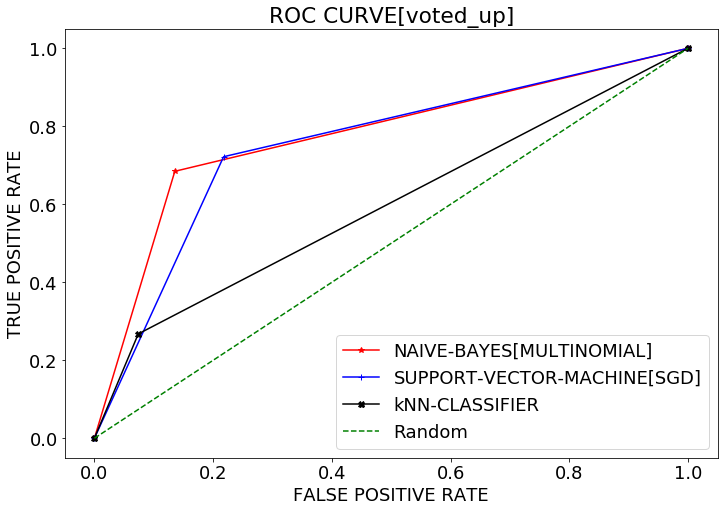


AUC Naive-Bayes[voted_up]: 0.775

AUC Support_Vector_Machine[voted_up]: 0.752

AUC kNearestNeighboursClassifier[voted_up]: 0.597


In [30]:
#Implementing ROC curve and AUC value[voted_up]
from sklearn.metrics import roc_curve
plt.rcParams['figure.figsize'] = (10.0,7.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=18)
plt.plot(fpr_nb, tpr_nb, marker='*',color='red', label='NAIVE-BAYES[MULTINOMIAL]')
plt.plot(fpr_svm, tpr_svm, marker='+',color='blue', label='SUPPORT-VECTOR-MACHINE[SGD]')
plt.plot(fpr_knn, tpr_knn, marker='X',color='black', label='kNN-CLASSIFIER')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random',color ='green')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.title('ROC CURVE[voted_up]')
plt.show()
auc_nb = roc_auc_score(test_y1,y1_predicted_nb)
print('\nAUC Naive-Bayes[voted_up]: %.3f' % auc_nb)
auc_svm = roc_auc_score(test_y1,y1_predicted_svm)
print('\nAUC Support_Vector_Machine[voted_up]: %.3f' % auc_svm)
auc_kNN = roc_auc_score(test_y1,y1_predicted_knn)
print('\nAUC kNearestNeighboursClassifier[voted_up]: %.3f' % auc_kNN)

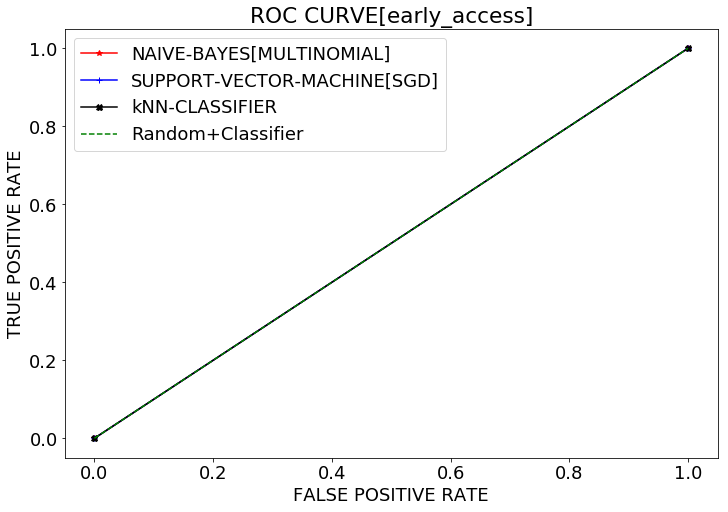


AUC Naive-Bayes[early_acess]: 0.500

AUC Support_Vector_Machine[early_acess]: 0.500

AUC kNearestNeighboursClassifier[early_acess]: 0.500


In [42]:
#Implementing ROC curve and AUC value[early_access]
plt.plot(fpr_nb_ea, tpr_nb_ea, marker='*',color='red', label='NAIVE-BAYES[MULTINOMIAL]')
plt.plot(fpr_svm_ea, tpr_svm_ea, marker='+',color='blue', label='SUPPORT-VECTOR-MACHINE[SGD]')
plt.plot(fpr_knn_ea, tpr_knn_ea, marker='X',color='black', label='kNN-CLASSIFIER')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random+Classifier',color ='green')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.title('ROC CURVE[early_access]')
plt.show()
auc_nb_ea = metrics.roc_auc_score(test_y2,y2_predicted_nb)
print('\nAUC Naive-Bayes[early_acess]: %.3f' % auc_nb_ea)
auc_svm_ea = metrics.roc_auc_score(test_y2,y2_predicted_svm)
print('\nAUC Support_Vector_Machine[early_acess]: %.3f' % auc_svm_ea)
auc_kNN_ea = metrics.roc_auc_score(test_y2,y2_predicted_knn)
print('\nAUC kNearestNeighboursClassifier[early_acess]: %.3f' % auc_kNN_ea)